In [ ]:
# Objective:
#     The objective of this project is to build a classifier model to predict which people were most likely to survive using
# passenger data.

# Data set:
#     The data set used here is taken from "https://www.kaggle.com/c/titanic/download/GQf0y8ebHO0C4JXscPPp%2Fversions%2FXkNkvXwqPPVG0Qt3MtQT%2Ffiles%2Ftrain.csv" 
# from the kaggle Titanic Surivor Predictor Competition.
# It consists of passenger details like Passenger name, Age, Gender, etc. 

# Features:
#     The given dataset consists of the following columns:
# 1) PassengerId      
# 2) Survived         
# 3) Pclass           
# 4) Name             
# 5) Sex              
# 6) Age            
# 7) SibSp          
# 8) Parch            
# 9) Ticket           
# 10) Fare             
# 11) Cabin          
# 12) Embarked       

In [1]:
#importing necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
#Loading the data into the variables
#The train variable contains the data to be used to train the model and the model will predict the chance of survival of 
#passengers in the test data 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#Checking for any missing values

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train.shape

(891, 12)

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

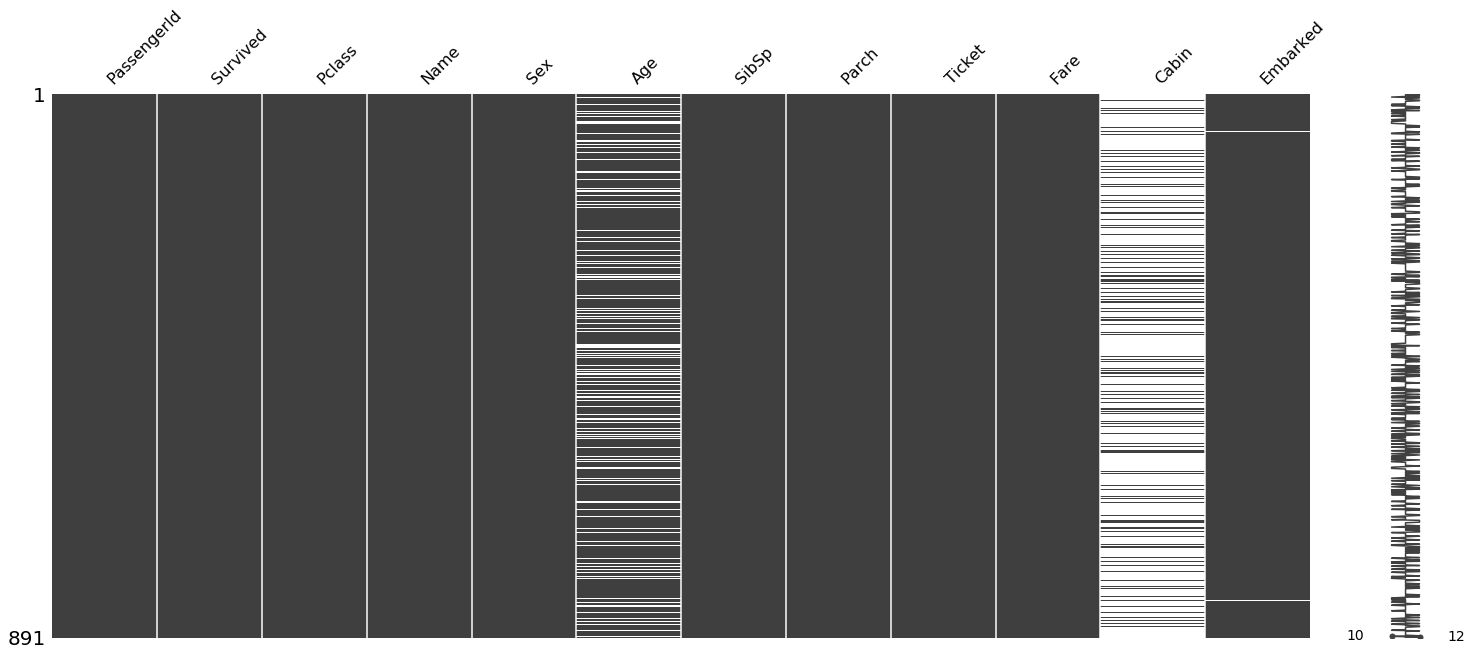

In [8]:
import missingno as mn
mn.matrix(train)

In [ ]:
#Handling Missing Values

In [10]:
#training data

#Since the cabin column has more than 75% data missing, it is droped.
cleanedTrain = train.drop('Cabin', axis=1)
cleanedTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
#The age column and embarked are imputed and the cleaned data set is stored in cleanedTrain.

from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis=1)



C:\Users\Harsha Vardhan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [12]:
Age = imputer.fit_transform(cleanedTrain['Age'].values.reshape(1,-1))
Age = Age.T

In [13]:
cleanedTrain['Age'] = Age

In [14]:
cleanedTrain.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [15]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
cleanedTrain.Embarked.fillna('S', inplace = True)

In [17]:
cleanedTrain[cleanedTrain.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [18]:
cleanedTrain.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
cleanedTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


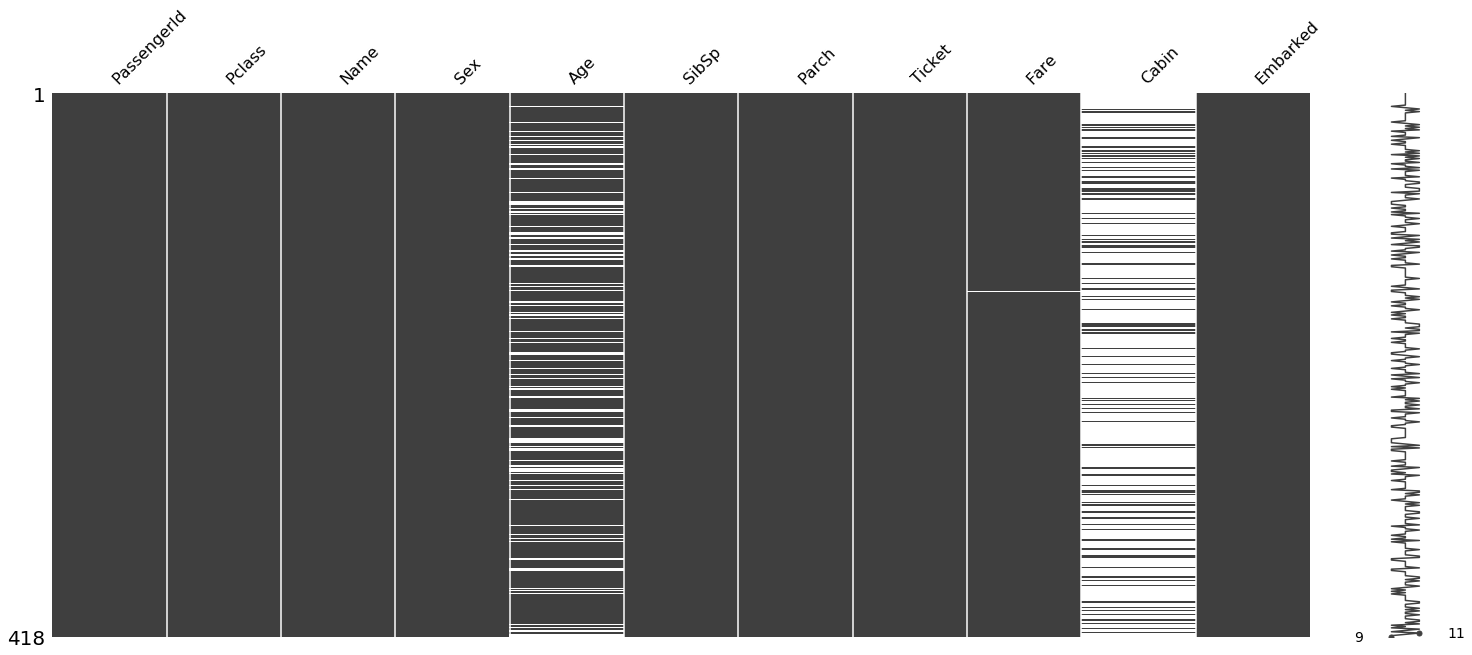

In [20]:
#test data
#Similarly the test data is cleaned and stored in cleanedTest.

mn.matrix(test)

In [21]:
cleanedTest = test.drop('Cabin', axis=1)

In [22]:
cleanedTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [23]:
testAge = imputer.fit_transform(test['Age'].values.reshape(1,-1))

testAge = testAge.T

In [24]:
cleanedTest['Age'] = testAge

In [25]:
cleanedTest.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [26]:
testFare = imputer.fit_transform(test['Fare'].values.reshape(1,-1))
testFare = testFare.T

cleanedTest['Fare'] = testFare

In [27]:
cleanedTest.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [28]:
cleanedTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [29]:
#Encoding categorical variables - Age and Embarked

In [30]:
cleanedTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [31]:
#Sex is encoded into 0 - Male and 1 - Female

cleanedTrain['Sex'] = cleanedTrain.Sex.apply(lambda x:0 if x == 'male' else 1)

cleanedTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [32]:
cleanedTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [33]:
cleanedTest['Sex'] = cleanedTest['Sex'].apply(lambda x:0 if x == 'male' else 1)

In [34]:
cleanedTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S


In [35]:
cleanedTrain['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
def f(x):
    if(x == 'S'):
        return 0
    elif(x == 'C'):
        return 1
    elif(x == 'Q'):
        return 2

In [37]:
# Embarked is encoded as:  S - 0; C - 1; Q - 2 

cleanedTrain['Embarked'] = cleanedTrain.Embarked.apply(f)

In [38]:
cleanedTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [39]:
cleanedTest['Embarked'] = cleanedTest.Embarked.apply(f)

In [40]:
cleanedTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


In [46]:
#Exploratory Analysis

In [47]:
cleanedTrain.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [48]:
cleanedTrain.groupby('Survived').mean()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,,
0,447.016393,2.531876,0.147541,30.415100,0.553734,0.329690,22.117887,0.307832
1,444.368421,1.950292,0.681287,28.549778,0.473684,0.464912,48.395408,0.447368


In [49]:
cleanedTrain.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
Sex,,,,,,,,
0,454.147314,0.188908,2.389948,30.505824,0.429809,0.235702,25.523893,0.306759
1,431.028662,0.742038,2.159236,28.216730,0.694268,0.649682,44.479818,0.461783


In [50]:
#correlation plot

In [51]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


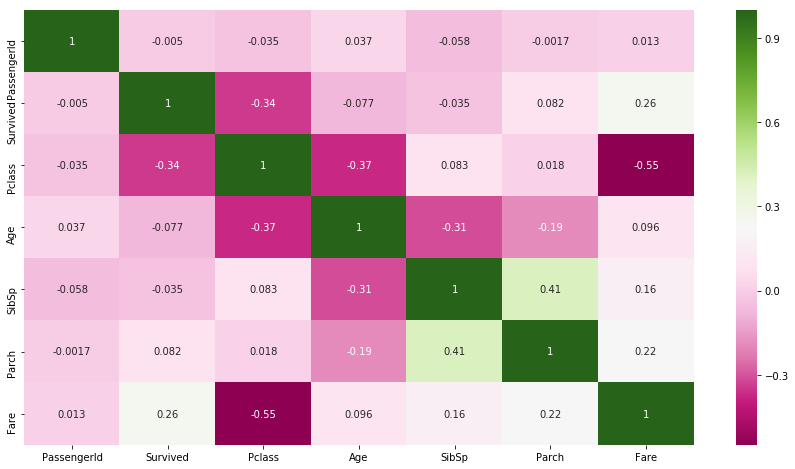

In [52]:
plt.subplots(figsize=(15,8))

sns.heatmap(train.corr(), annot=True, cmap='PiYG')

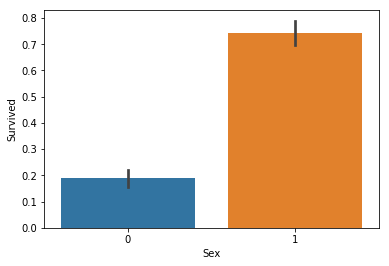

In [53]:
sns.barplot(x='Sex', y='Survived', data=cleanedTrain)

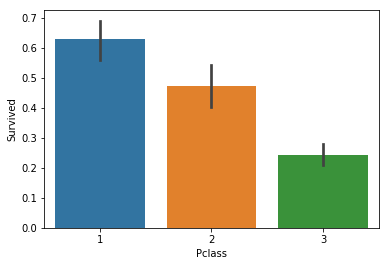

In [54]:
sns.barplot(x='Pclass', y='Survived', data=cleanedTrain)

In [55]:
#Model Building

In [56]:
#The XGBClassifier is used

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [57]:
cleanedTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [58]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [59]:
# Name and PassengerId is excluded.

X = cleanedTrain[features]

X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [60]:
y = cleanedTrain['Survived']

y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [69]:
#The training data is split into training and validation set

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state = 0)

In [70]:
learning_model = XGBClassifier()

In [71]:
learning_model.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [72]:
pred_y = learning_model.predict(val_X)

In [73]:
accuracy = accuracy_score(pred_y, val_y)

In [77]:
accuracy*100

84.35754189944134

In [ ]:
#Parameter tuning

In [86]:
#Finding the combination of n_estimators and max_depth to increase accuracy

m = 0
max_accuracy = 0.0

n_e = 0
m_D = 0

for max_depth in range(1, 15):
    for n_estimators in [5, 10, 50, 100, 500]:
        learning_model = XGBClassifier(max_depth = max_depth, n_estimators = n_estimators)
    
        learning_model.fit(train_X, train_y)
        
        accuracy = accuracy_score(learning_model.predict(val_X), val_y)
        if(accuracy > m):
            m = accuracy
            n_e = n_estimators
            m_D = max_depth
        
print(str(m_D)+' '+str(n_e)+' - '+str(m*100)+'%')
    

7 50 - 87.15083798882681%


In [ ]:
#final Model

In [88]:
finalModel = XGBClassifier(max_depth=7, n_estimators=50)

finalModel.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=7, min_child_weight=1, missing=None,
       n_estimators=50, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [90]:
test = cleanedTest[features]

In [91]:
finalPrediction = finalModel.predict(test)

In [94]:
finalPrediction = pd.Series(finalPrediction)

In [97]:
frame = {'PassengerId': cleanedTest['PassengerId'], 'Survived': finalPrediction}

Result = pd.DataFrame(frame)

In [99]:
Result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [101]:
Result.to_csv('titanic.csv', index=False)